In [1]:
import pegasus as pg

In [3]:
ls ../terra

1113mecom_ica.h5ad         mecom_1116.ipynb
1113mecom_ica.sce.rsd      mecom_ss2_10x.sce.rsd
1113mecom_ss2_10x.h5ad     sce2h5ad.ipynb
201116_mecom_10x_rv3.h5ad  seurat.ipynb
MPAL.ipynb


In [4]:
# data = pg.read_input("../terra/1113mecom_ss2_10x.h5ad")
# data_mpal = pg.read_input("../../../datasets/MPAL-Single-Cell-2019/scRNA-Healthy-Hematopoiesis-191120.h5ad")
data = pg.read_input("../lhsc_10x_3rd.GRCh38-rna.h5ad")
# data=pg.read_input("~/Projects/mecom/exp/200703/matrix/200803_mecom_af_cellcyc.h5ad")
# data=pg.read_input("~/Projects/mecom/exp/200703/matrix/200803_mecom.h5ad")
# data=pg.read_input("~/Projects/mecom/exp/200703/matrix/adata_pg.h5ad")
# data=pg.read_input("~/Projects/mecom/exp/200703/matrix/201116_mecom_ss2_genotye_rv3_pg.h5ad")



2021-04-13 10:02:32,224 - pegasusio.readwrite - INFO - h5ad file '../lhsc_10x_3rd.GRCh38-rna.h5ad' is loaded.
2021-04-13 10:02:32,225 - pegasusio.readwrite - INFO - Function 'read_input' finished in 2.96s.


In [5]:
data.X

<10226x22605 sparse matrix of type '<class 'numpy.float32'>'
	with 29477412 stored elements in Compressed Sparse Row format>

In [6]:
data.obs['Channel'].value_counts()

MECOM_16K    5935
AAVS1_11K    4291
Name: Channel, dtype: int64

In [7]:
data.uns['genome']='GRCh38'

In [8]:
data.uns['modality']='rna'

## Preprocessing

### Filtration

The first step in preprocessing is to perform the quality control analysis, and remove cells and genes of low quality.

We can generate QC metrics using the following method with default settings:

In [9]:
pg.qc_metrics(data, min_genes=500, max_genes=6000,percent_mito=20, mito_prefix='MT-')

The metrics considered are:
* **Number of genes**: keep cells with $500 \leq \text{# Genes} < 6000$ *(Default)*;
* **Number of UMIs**: don't filter cells due to UMI bounds *(Default)*;
* **Percent of Mitochondrial genes**: keep cells with percent $< 10\%$.

For details on customizing your own thresholds, see [documentation](https://pegasus.readthedocs.io/en/latest/api/pegasus.qc_metrics.html).

Numeric summaries on filtration on cell barcodes and genes can be achieved by `get_filter_stats` method:

In [10]:
df_qc = pg.get_filter_stats(data)
df_qc

,kept,median_n_genes,median_n_umis,median_percent_mito,filt,total,median_n_genes_before,median_n_umis_before,median_percent_mito_before
Channel,,,,,,,,,
AAVS1_11K,4291,3150,8661.931641,0.744927,0,4291,3150,8661.931641,0.744927
MECOM_16K,5935,2583,7754.617188,0.834753,0,5935,2583,7754.617188,0.834753


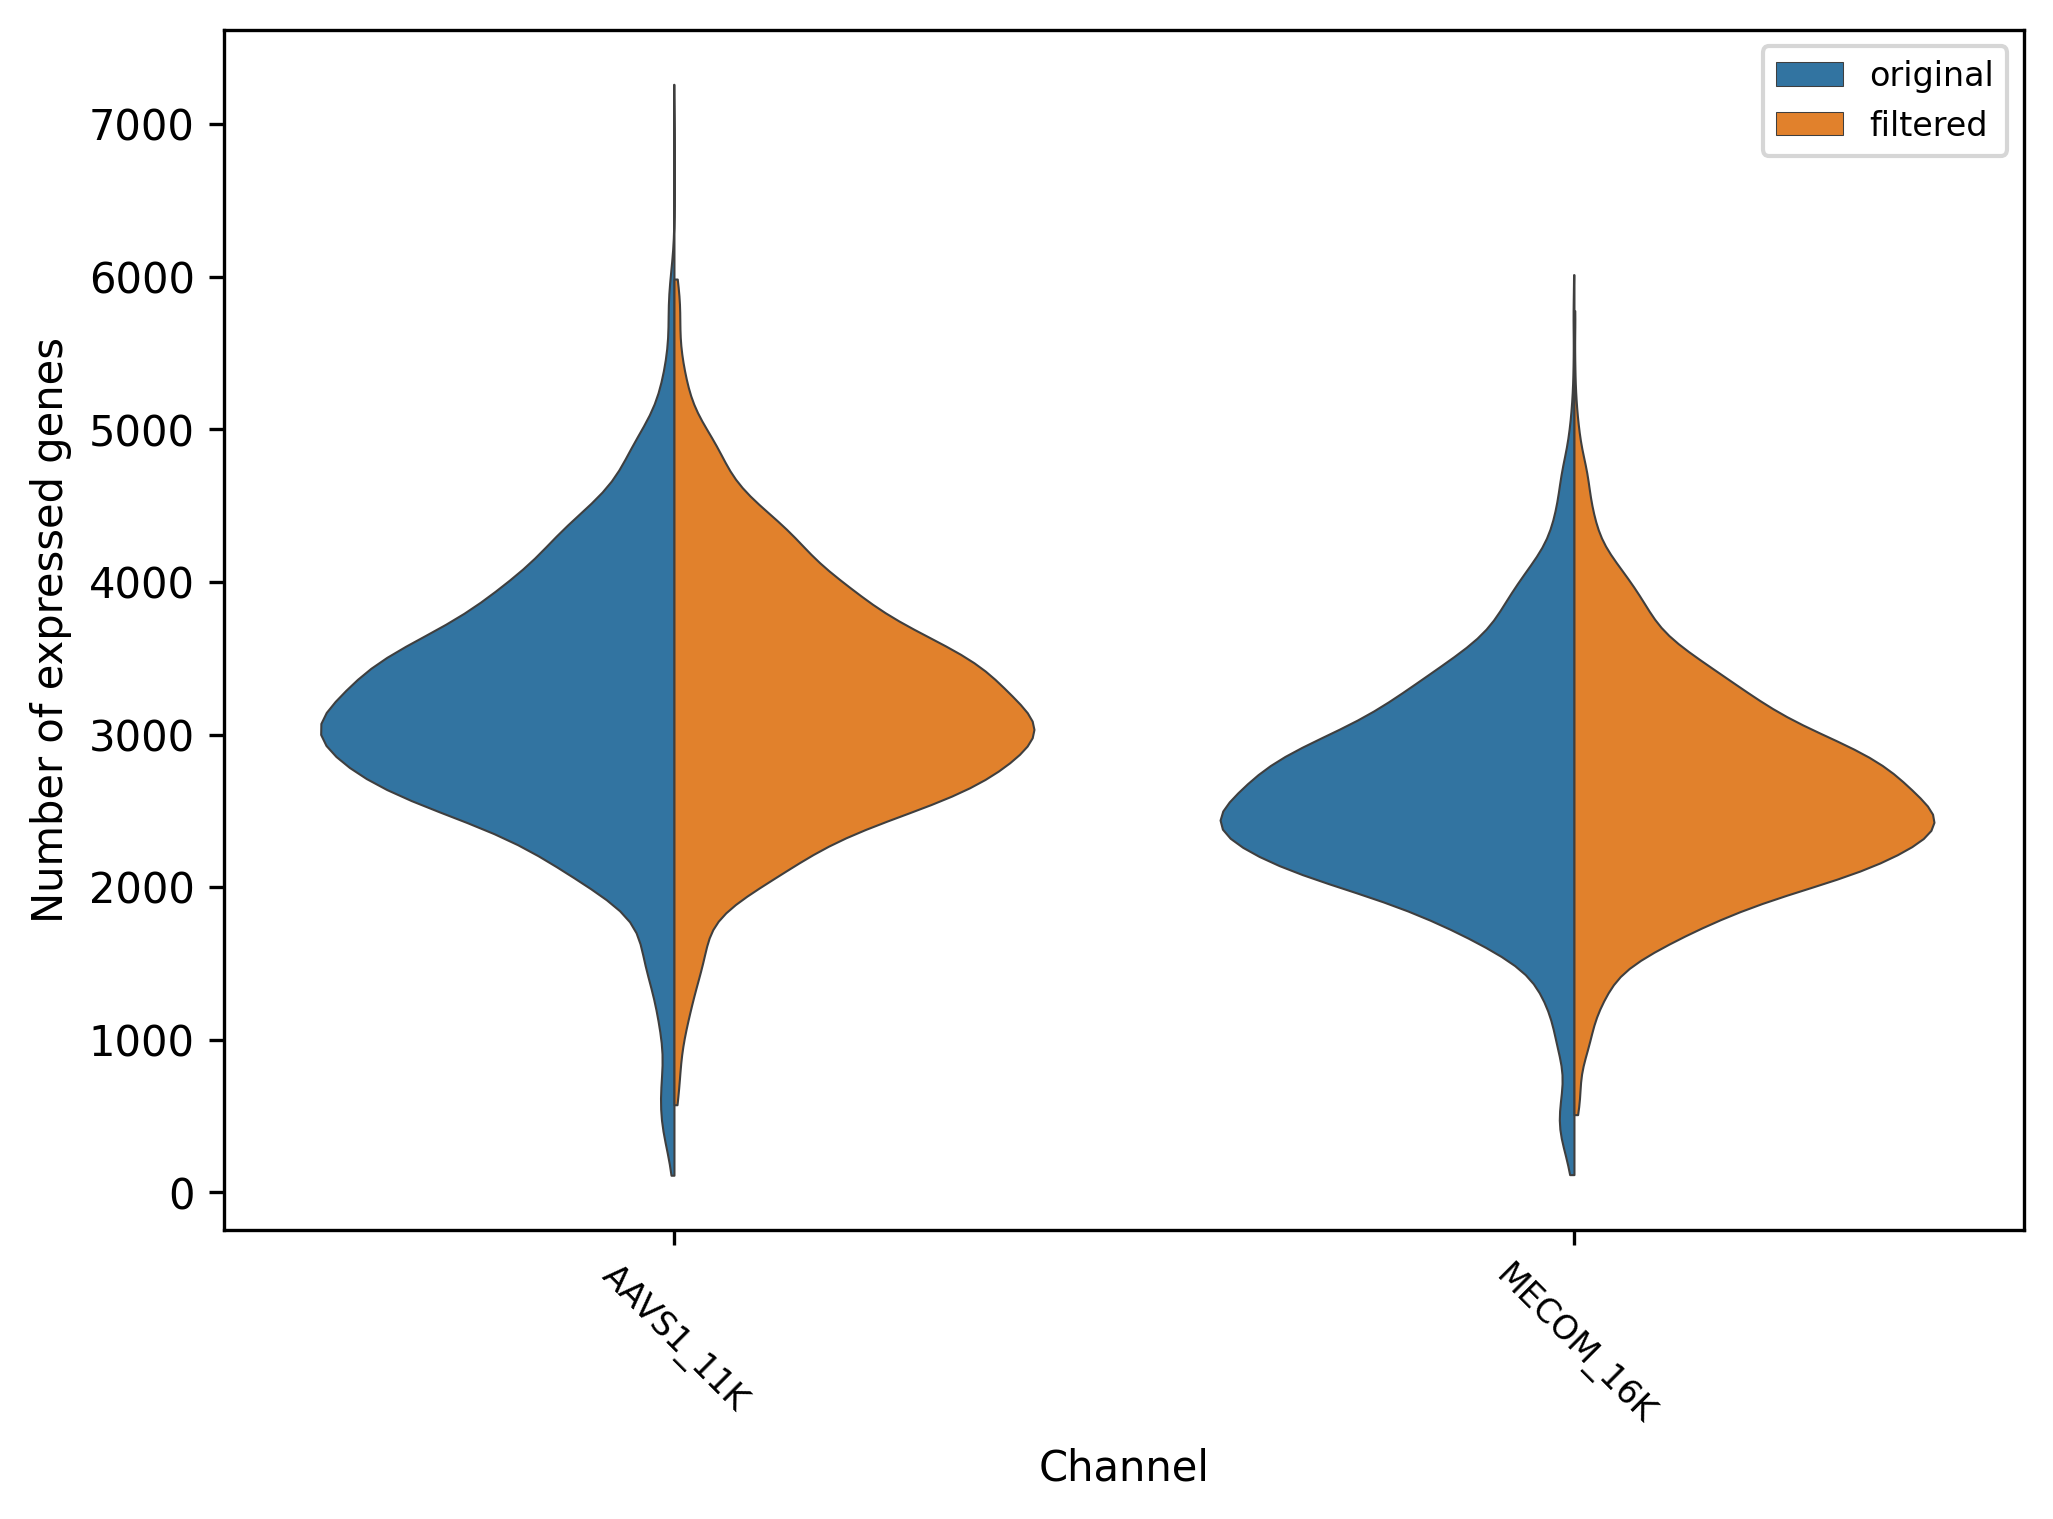

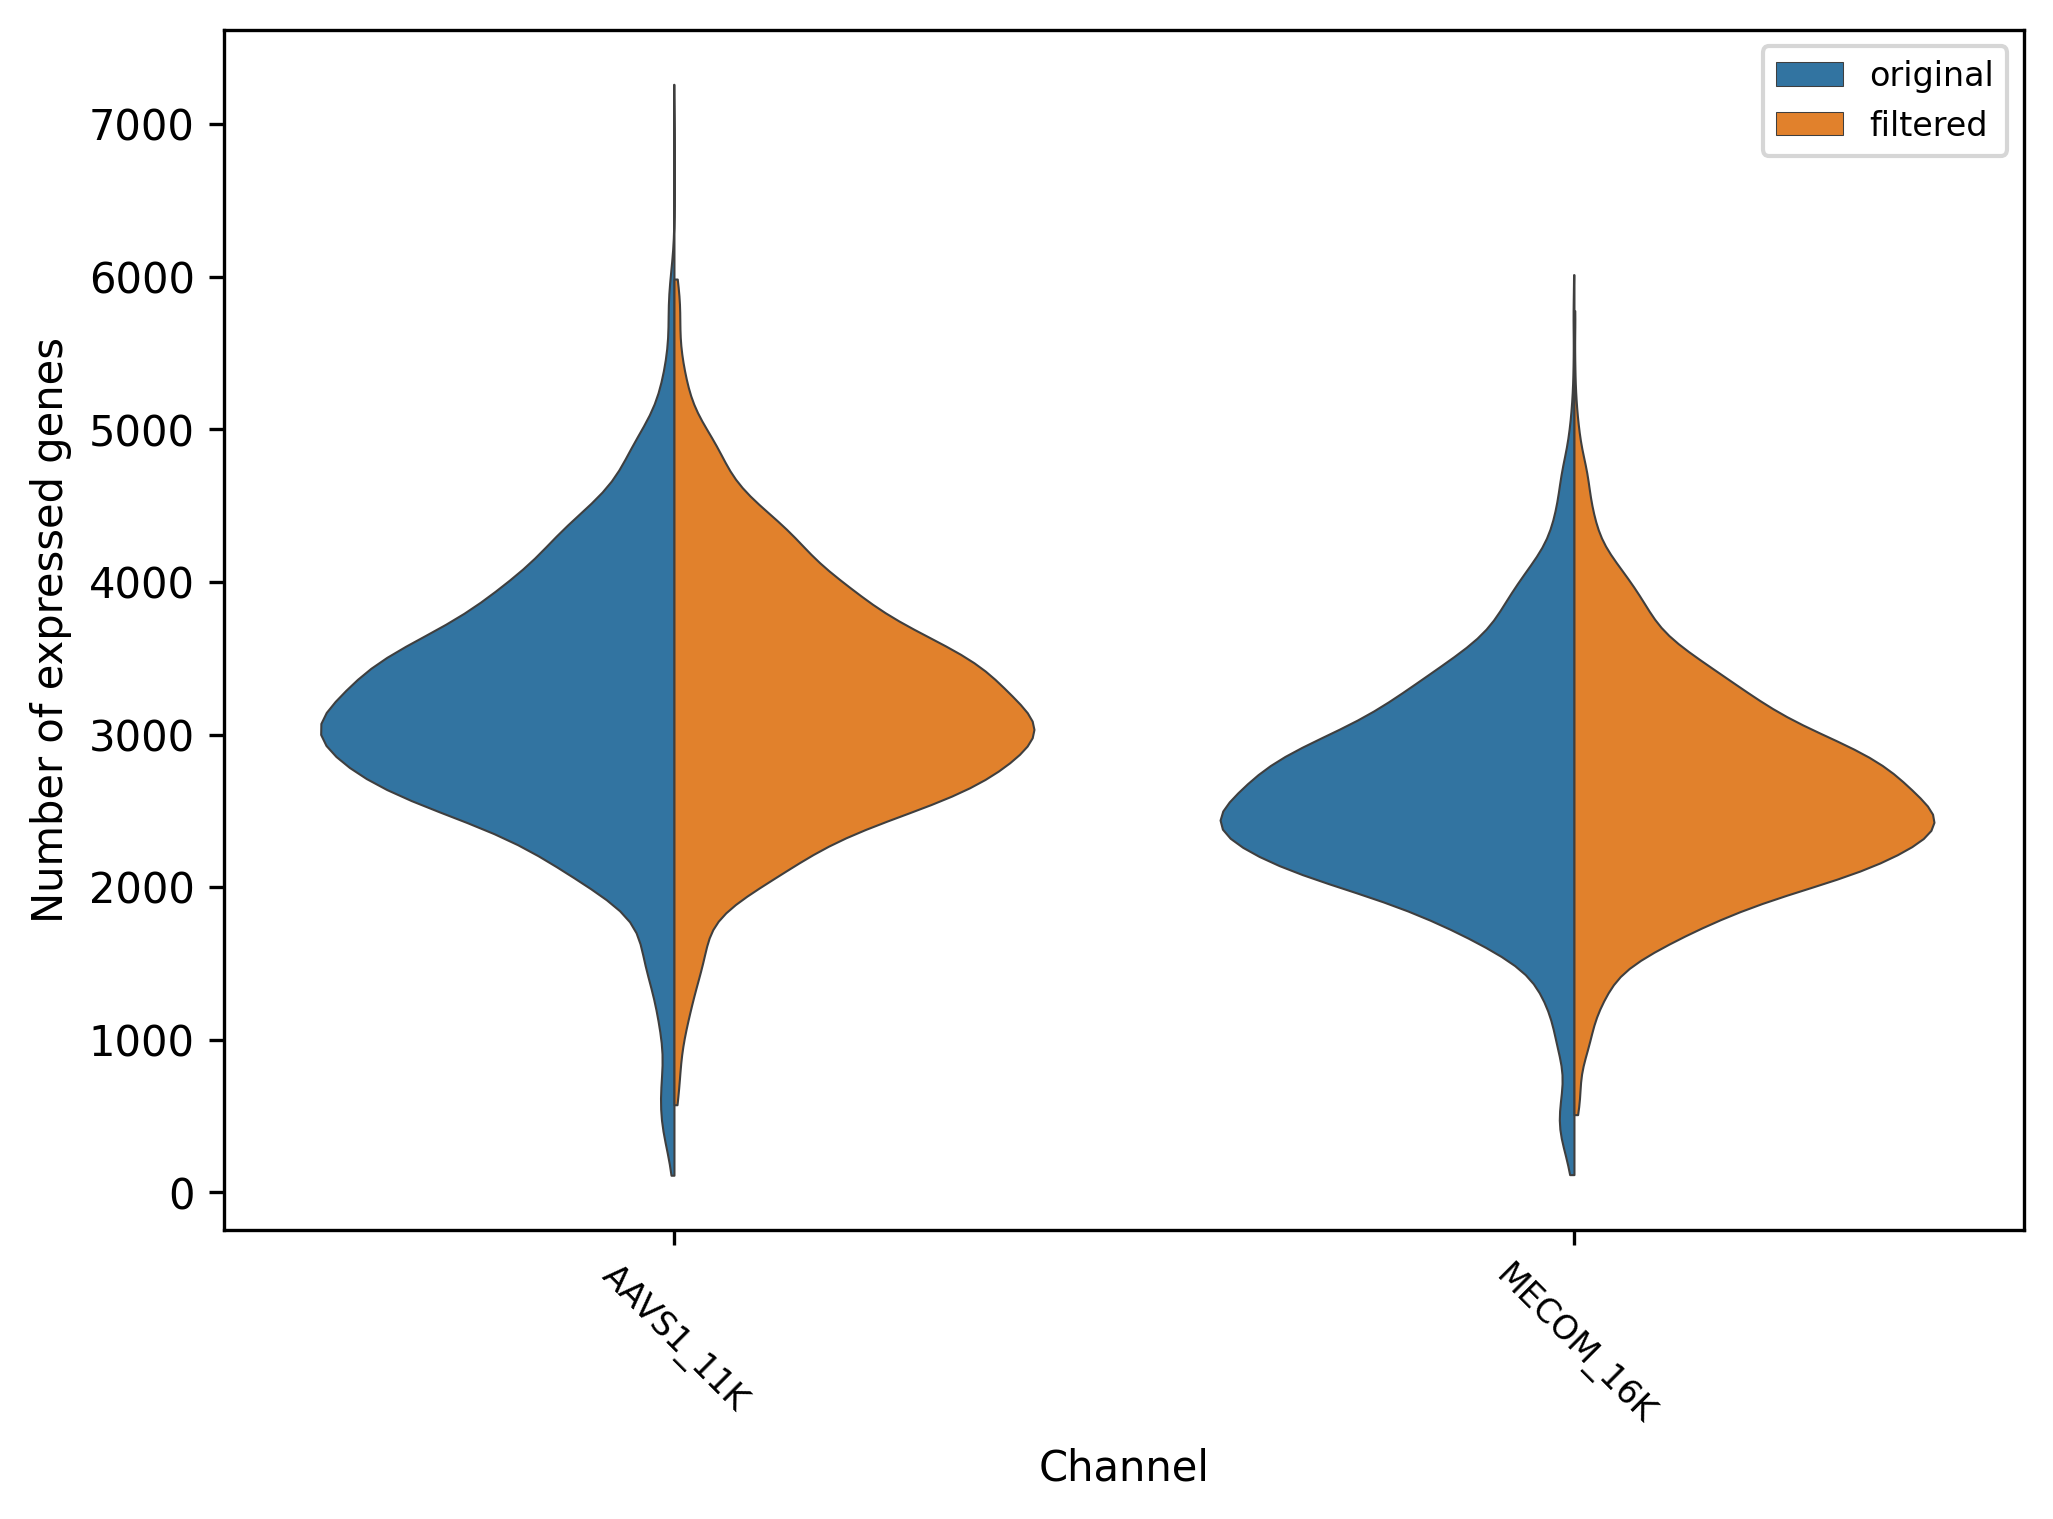

In [11]:
pg.qcviolin(data, plot_type='gene',return_fig = True)

Then on number of UMIs:

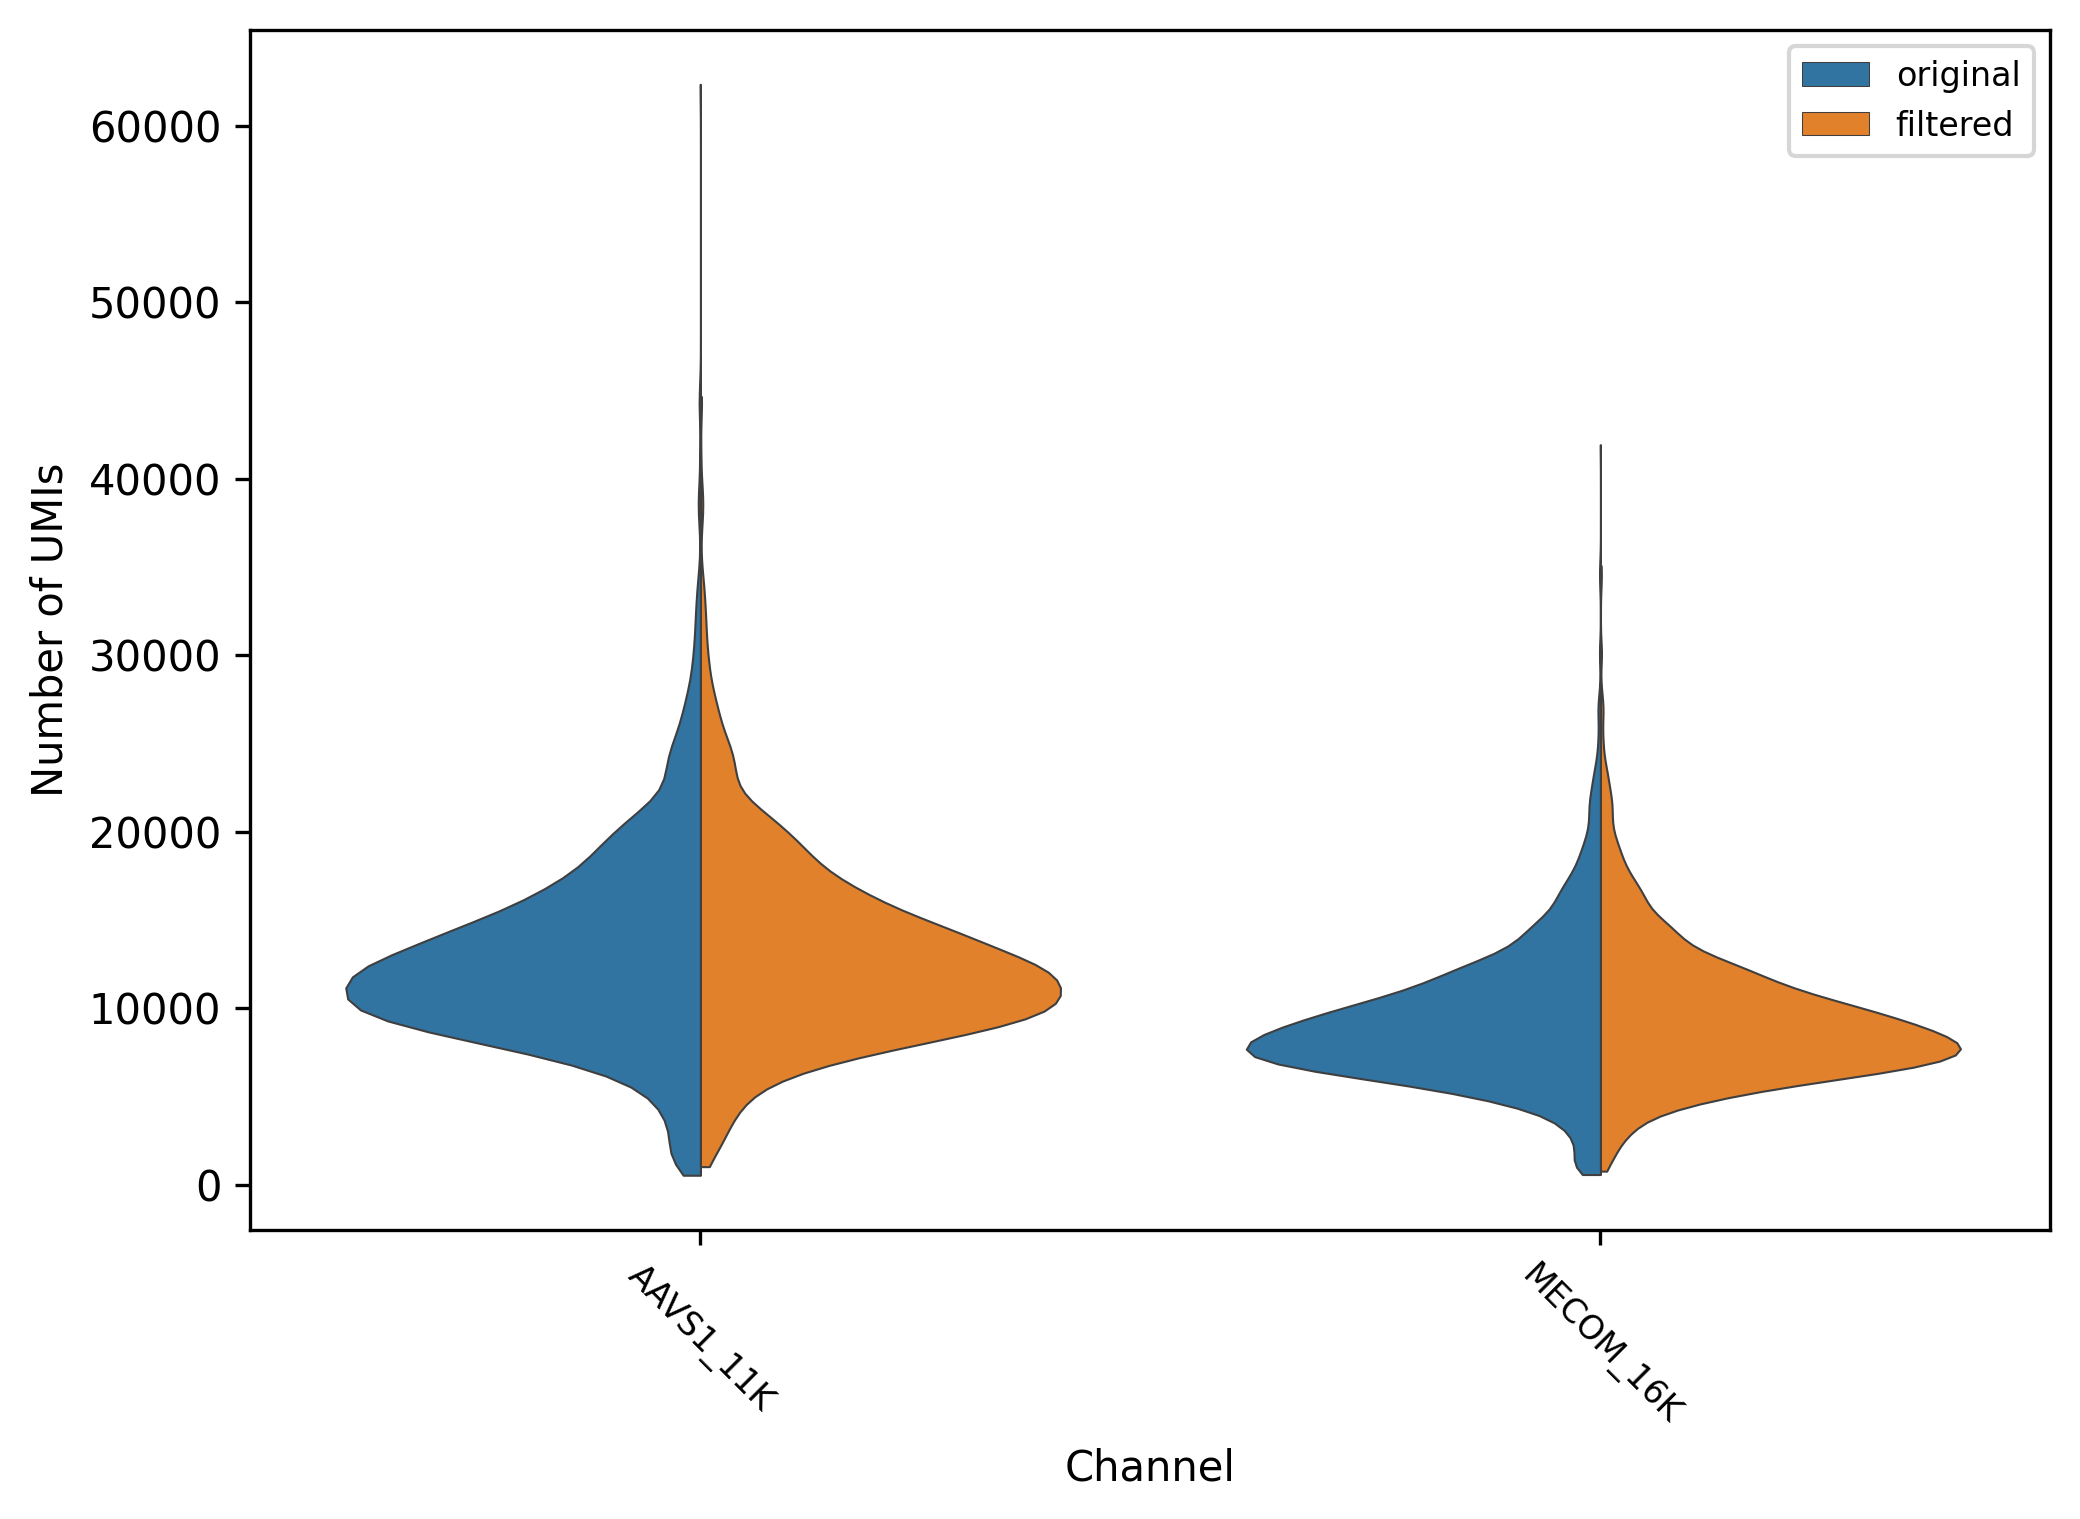

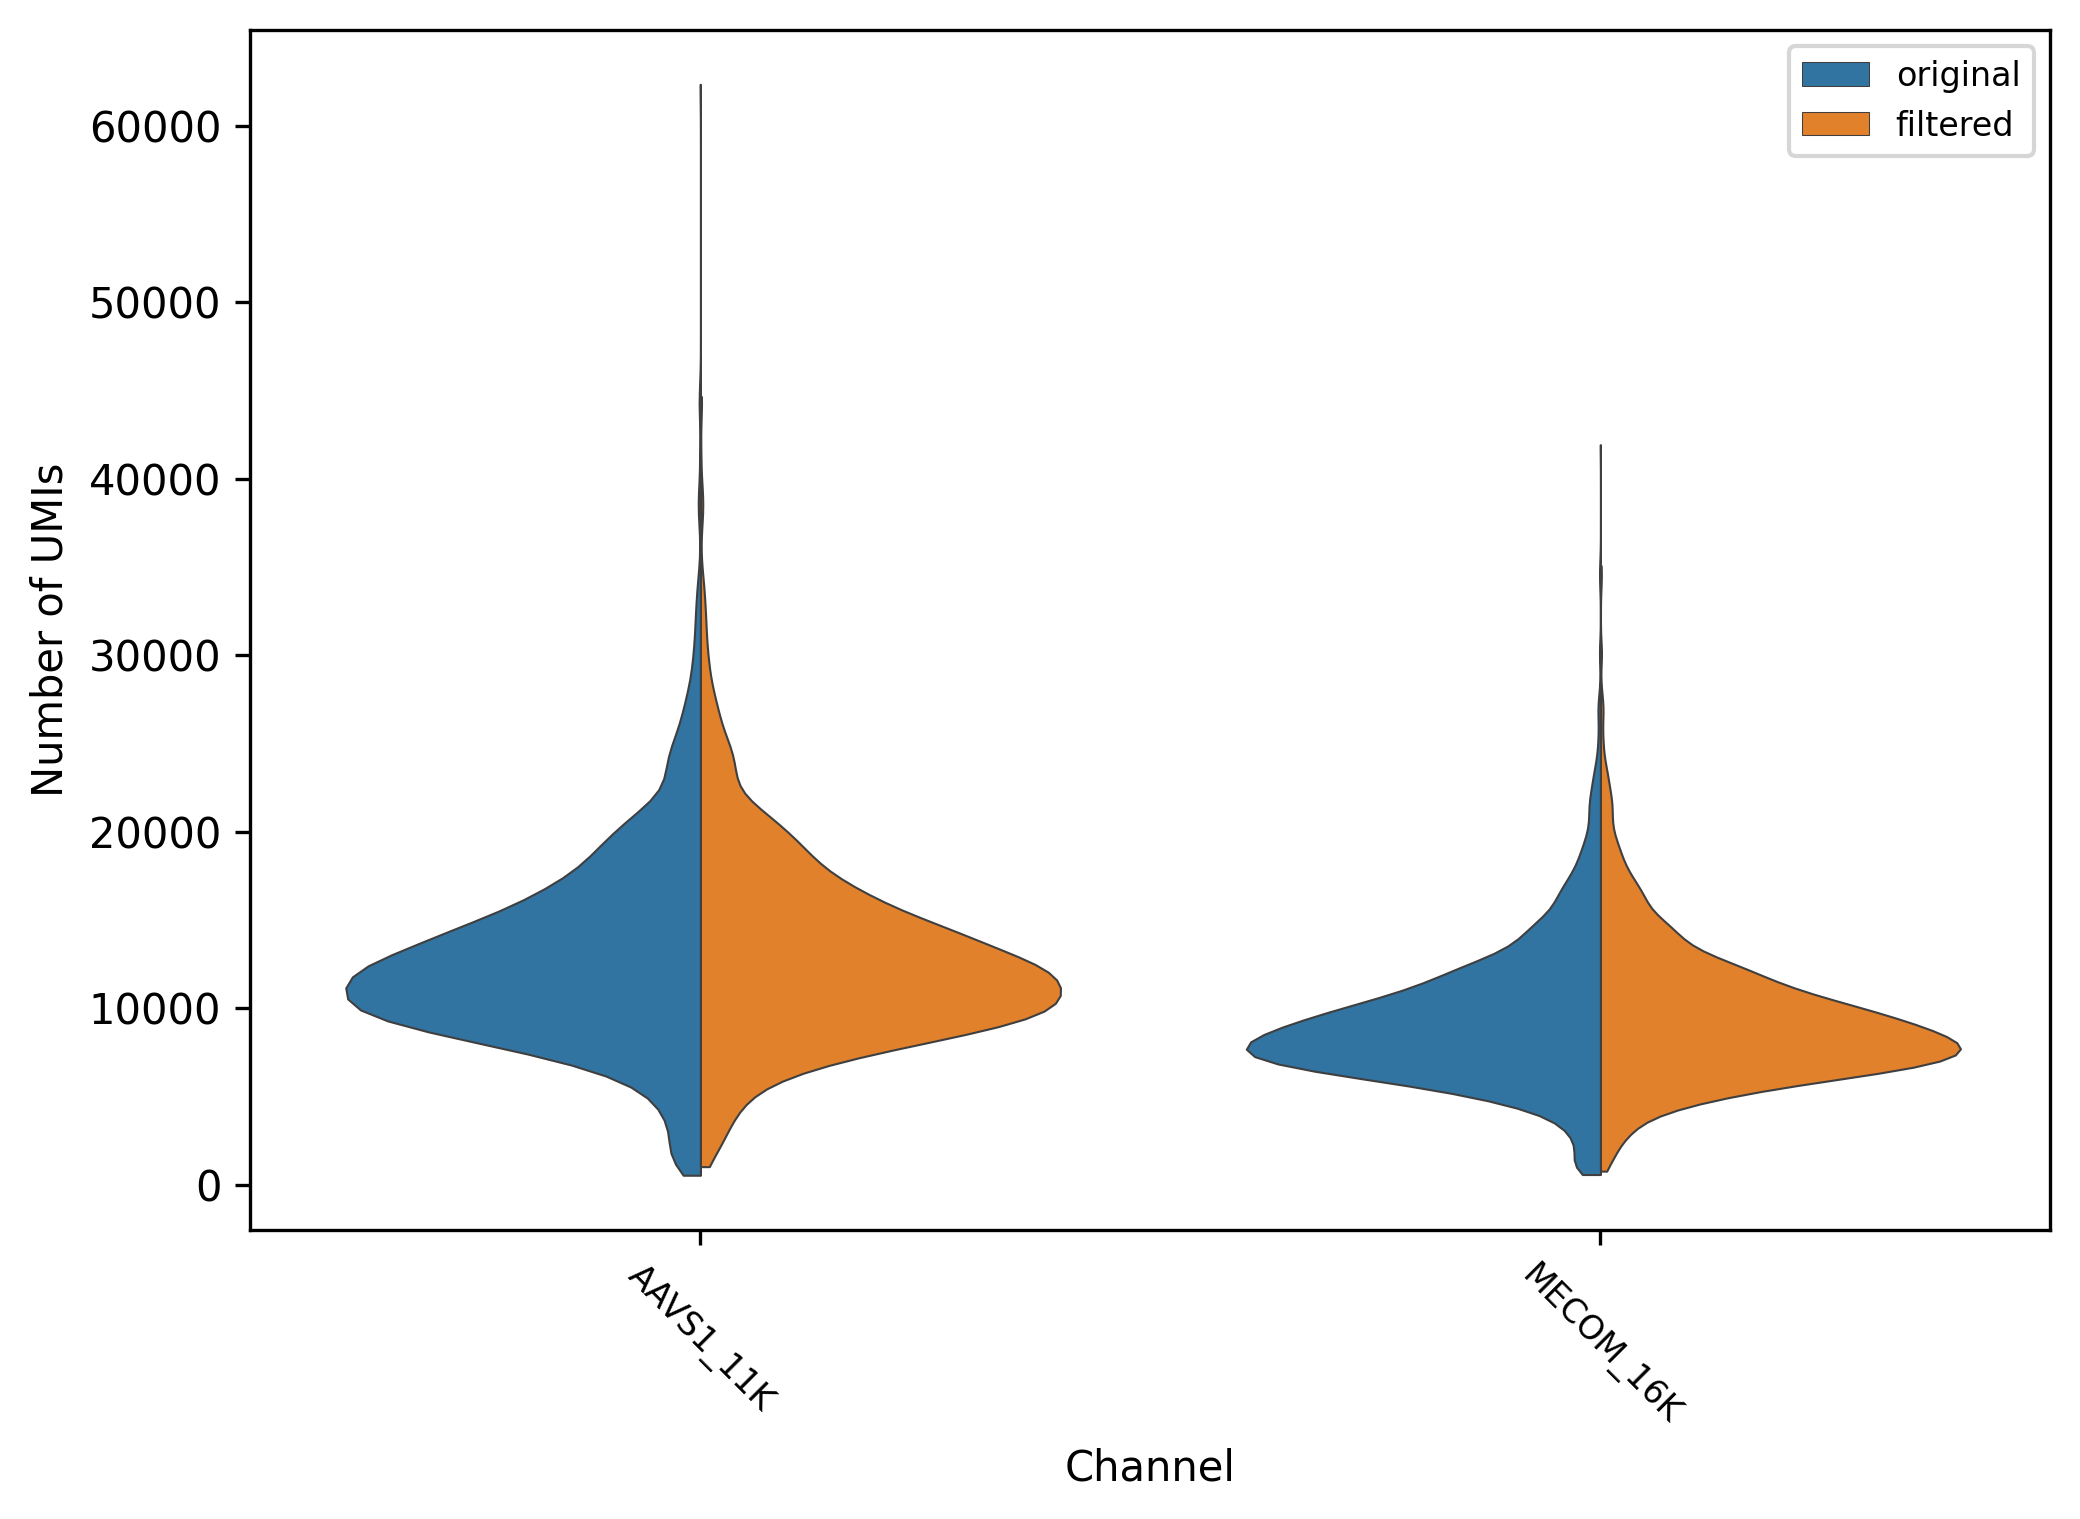

In [12]:
pg.qcviolin(data, plot_type='count',return_fig = True)

On number of percentage of mitochondrial genes:

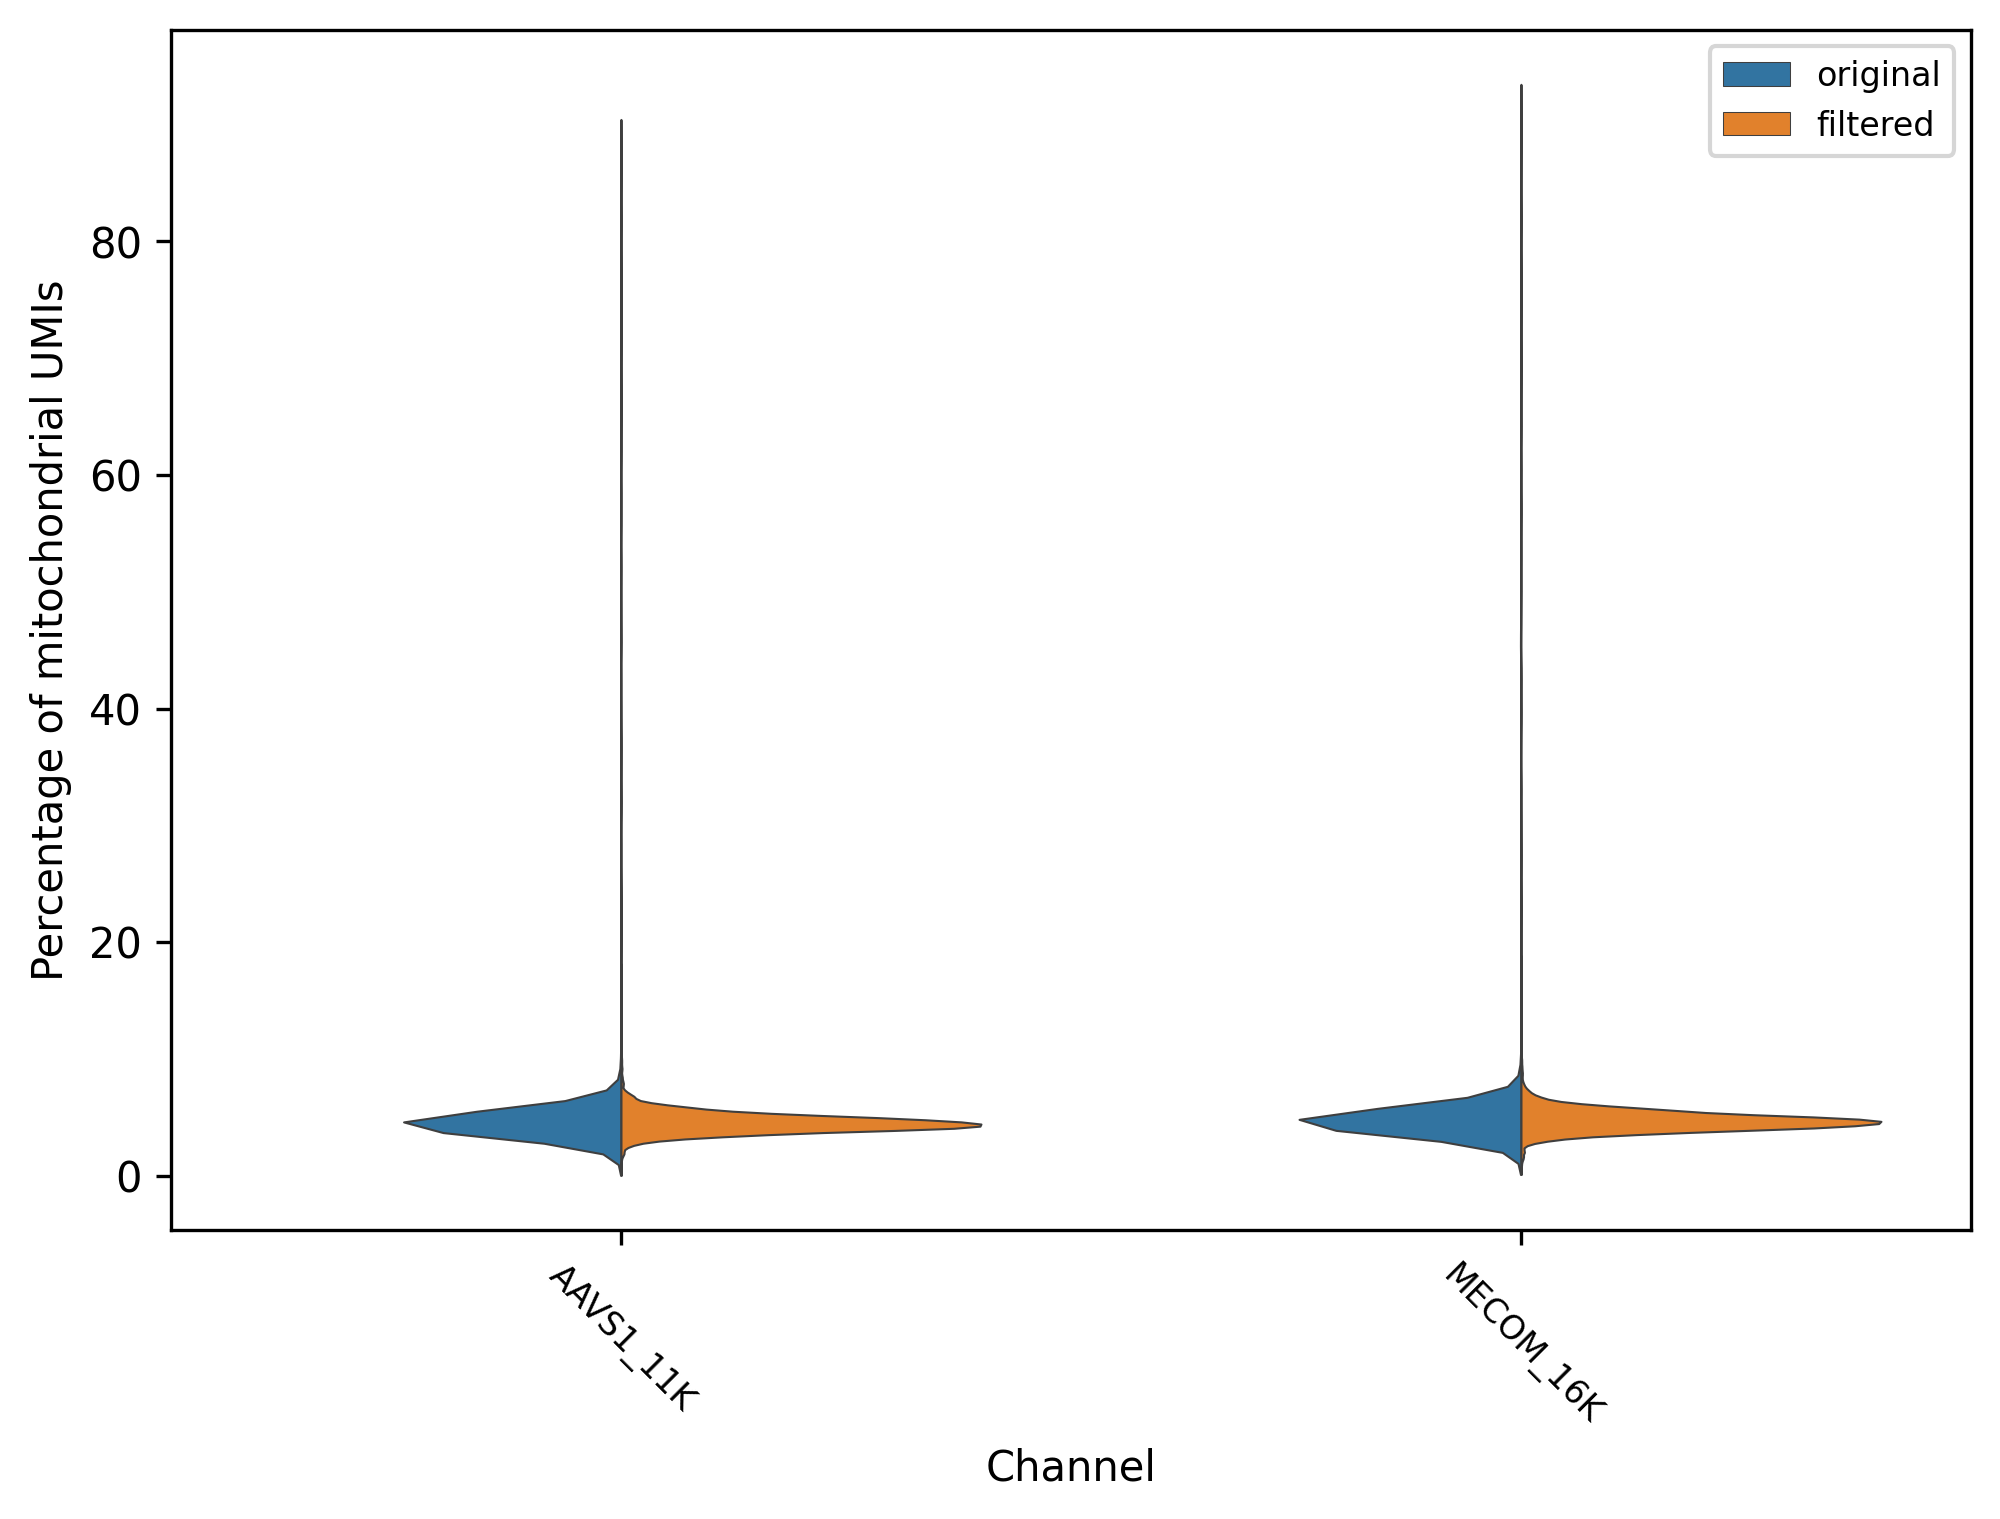

In [13]:
pg.qcviolin(data, plot_type='mito')

Now filter cells based on QC metrics set in `qc_metrics`:

In [35]:
pg.filter_data(data)

2020-12-02 12:35:51,743 - pegasusio.qc_utils - INFO - After filtration, 10226 out of 10226 cell barcodes are kept in UnimodalData object GRCh38-rna.
